# tableの確認

In [1]:
import pandas as pd
news = pd.read_csv('newsCorpora.csv', sep="\t", header=None, names=["ID","TITLE","URL","PUBLISHER","CATEGORY","STORY","HOSTNAME","TIMESTAMP"],index_col="ID")
news = news.query('PUBLISHER in ["Reuters","Huffington Post","Businessweek", "Contactmusic.com", "Daily Mail"]')
print(news.info())
news.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13340 entries, 13 to 422838
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TITLE      13340 non-null  object
 1   URL        13340 non-null  object
 2   PUBLISHER  13340 non-null  object
 3   CATEGORY   13340 non-null  object
 4   STORY      13340 non-null  object
 5   HOSTNAME   13340 non-null  object
 6   TIMESTAMP  13340 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 833.8+ KB
None


,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
ID,,,,,,,
41481,"WRAPUP 2-Bullish consumers, rising home prices...",http://www.reuters.com/article/2014/03/25/usa-...,Reuters,b,dfBS3RPqkm4eq8MhSZx-pHIez0eqM,www.reuters.com,1395770054245
128367,Morgan Stanley reduces risky fixed-income asse...,http://in.reuters.com/article/2014/04/17/morga...,Reuters,b,d8yYZMW1FZ9vgCM4auekiP0m2XHKM,in.reuters.com,1397762473985
37039,MSG Buys 50 Percent Stake in De Niro's Tribeca...,http://www.businessweek.com/news/2014-03-23/ms...,Businessweek,e,dnarXPO3QPc-aCMK1PH3EFV0AN9WM,www.businessweek.com,1395628798677
281665,Lack of sun raises early death risk for middle...,http://www.dailymail.co.uk/health/article-2656...,Daily Mail,m,dSoXsuZbs3ZDtwMRTEZ16fQD8L0dM,www.dailymail.co.uk,1402691976422
356202,FDA approves Spectrum Pharma's blood cancer drug,http://in.reuters.com/article/2014/07/03/spect...,Reuters,m,d6K0BWV9rrvMY7MOnPGOJbZdZ4fjM,in.reuters.com,1404474317002


# publisher

In [2]:
news['PUBLISHER'].value_counts()

Reuters             3902
Huffington Post     2455
Businessweek        2395
Contactmusic.com    2334
Daily Mail          2254
Name: PUBLISHER, dtype: int64

# category

> CATEGORY News category (b = business, t = science and technology, e = entertainment, m = health)

In [3]:
news['CATEGORY'].value_counts()

b    5627
e    5279
t    1524
m     910
Name: CATEGORY, dtype: int64

# story

> STORY Alphanumeric ID of the cluster that includes news about the same story

In [4]:
news['STORY'].value_counts()

d_yCfTJxDUFGs_MQrL1DnBRuBd_eM    31
dAZC0aRMk1ONyvMUjTyEB_iZmrZLM    29
d3tIMfB2mg-9MZM4G_jGTEiRVl3jM    26
dj2gaJQ71DfKWyMRvKbZUWIkrAKLM    26
dbfJRt2YOiGnSoMC7S8yBd9gQohiM    24
                                 ..
d4jO_Xv5xeLPbLMguPw_hiVAOtq4M     1
diR1Ucyem6h8QVMKGL6J15wIDCshM     1
dGp2UJOLsC2pnvMzfNuy_I6EDFBsM     1
dUwrIO6OgjC-0PMW4tA1uUUgcR_DM     1
dCHk_KGbLopHziME562ZXs2Z5i51M     1
Name: STORY, Length: 4578, dtype: int64

In [5]:
news['story'] = news['STORY'].apply(lambda x:str(list(news['STORY'].unique()).index(x)))

In [6]:
news['story']

ID
13           0
14           0
20           0
21           0
30           0
          ... 
422819    4577
422820    4577
422821    4577
422828    4577
422838    4577
Name: story, Length: 13340, dtype: object

In [7]:
news = news.drop('STORY',axis=1)

# hostname

In [8]:
news['HOSTNAME'].value_counts()

in.reuters.com            2558
www.huffingtonpost.com    2455
www.businessweek.com      2395
www.contactmusic.com      2334
www.dailymail.co.uk       2254
www.reuters.com           1344
Name: HOSTNAME, dtype: int64

# timestamp

> TIMESTAMP Approximate time the news was published, as the number of milliseconds since the epoch 00:00:00 GMT, January 1, 1970

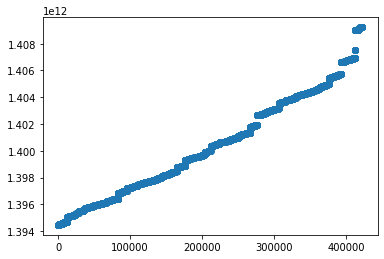

In [9]:
import matplotlib.pyplot as plt
plt.scatter(news.index, news['TIMESTAMP'])

In [10]:
news['TIMESTAMP']

ID
13        1394470501755
14        1394470501948
20        1394470503148
21        1394470503366
30        1394470505070
              ...      
422819    1409228423333
422820    1409228423827
422821    1409228424525
422828    1409228426943
422838    1409228430383
Name: TIMESTAMP, Length: 13340, dtype: int64

In [11]:
from datetime import datetime
get_dt = lambda ts:datetime.fromtimestamp(ts/1000)
get_dt_format = lambda ts,form:get_dt(ts).strftime(form)

news['month'] = news['TIMESTAMP'].apply(lambda ts:get_dt_format(ts,"%m"))
news['date'] = news['TIMESTAMP'].apply(lambda ts:get_dt_format(ts,"%d"))
news['day']  = news['TIMESTAMP'].apply(lambda ts:get_dt_format(ts,"%a"))
news['time'] = news['TIMESTAMP'].apply(lambda ts:get_dt_format(ts,"%H%M"))

# url

#### データの確認 => data_features_url.ipynbにて

In [12]:
from datetime import datetime, date
import re

In [13]:
news['URL'] = news['URL'].apply(lambda url:url.replace('—','-').replace('–','-'))

In [14]:
for url in news['URL']:
    for c in url:
        if c in " :/.-_=&;?\\+%()": continue
        if 'A'<=c<='Z': continue
        if 'a'<=c<='z': continue
        if '0'<=c<='9': continue
        raise Exception

## Reuters

In [15]:
def reuters(series, uri_sp):
    series['genre'] = uri_sp[0]
    if uri_sp[0]=="article":
        if uri_sp[1] != "2014": raise Exception("not 2014")
        series['m_month'] = uri_sp[2]
        series['m_date']  = uri_sp[3]
        other = uri_sp[4].split('-')
        ids = other[-1][2:]
        series['uri_features'] = ids[:-8] if ids[-8:-3]=="20140" else ids
        series['uri'] = other[:-1]
    elif uri_sp[0]=="video":
        series['m_month'] = uri_sp[2]
        series['m_date']  = uri_sp[3]
        series['uri'] = uri_sp[4].split('-')
    elif uri_sp[0]=="news":
        series['uri_features'] = uri_sp[1]+"-"+uri_sp[2]
    else: raise Exception("unknown type")
    return series

## Businessweek

In [16]:
def businessweek(series, uri_sp):
    series['genre'] = uri_sp[0]
    dt = uri_sp[1].split("-")
    if dt[0] != "2014": raise Exception("not 2014")
    series['m_month'] = dt[1]
    series['m_date']  = dt[2]
    series['uri_features'] = None
    series['uri'] = uri_sp[2].split("-")
    return series

## Huffington Post

In [17]:
def huffington(series, uri_sp):
    if uri_sp[0]=="2014":
        series['m_month'] = uri_sp[1]
        series['m_date']  = uri_sp[2]
        series['genre'] = 'hp'
        series['uri_features'] = None
        series['uri'] = uri_sp[3].split("-")[:-1]+[uri_sp[3].split("-")[-1].split("_")[0]]
    elif not not re.match(r'2014\d{4}',uri_sp[1]):
        series['m_month'] = uri_sp[1][4:6]
        series['m_date']  = uri_sp[1][6:]
        series['genre'] = 'huff-wires'
        series['uri_features'] = None
        series['uri'] = uri_sp[2].split("-")
    else:
        series['genre'] = 'hp-other'
        series['uri_features'] = None
        series['uri'] = uri_sp[0].split("-")+uri_sp[1].split("-")[:-1]+[uri_sp[1].split("-")[-1].split('_')[0]]
    return series

## Daily Mail

In [18]:
def dailymail(series, uri_sp):
    if not not re.match(r'article-\d{7}', uri_sp[1]):
        series['genre'] = uri_sp[0]
        series['uri_features'] = None
        series['uri'] = uri_sp[2].split("-")
    elif not not re.match(r'article-\d{7}', uri_sp[2]):
        series['genre'] = uri_sp[0]+"-"+uri_sp[1]
        series['uri_features'] = None
        series['uri'] = uri_sp[3].split("-")
    elif not not re.match(r'video-\d{7}', uri_sp[2]):
        series['genre'] = uri_sp[0]+"-"+uri_sp[1]
        series['uri_features'] = None
        series['uri'] = uri_sp[3].split("-")
    else: raise Exception("UNKNOWN type")
    return series

## Contactmusic.com

In [19]:
def contactmusic(series, uri_sp):
    series['genre'] = uri_sp[0]
    series['uri_features'] = None
    series['uri'] = uri_sp[1].split("-")[:-1]+[uri_sp[1].split("-")[-1].split('_')[0]]
    return series

## summary

In [20]:
def url_parse(series):
    uri = re.sub(r'.*?'+series['HOSTNAME']+'/(.*)',r'\1',series['URL'])
    uri_sp = uri.split('\\?')[0].split('/')
    if   series['PUBLISHER'] == "Reuters":         series = reuters(series, uri_sp)
    elif series['PUBLISHER'] == "Businessweek":    series = businessweek(series, uri_sp)
    elif series['PUBLISHER'] == "Huffington Post": series = huffington(series, uri_sp)
    elif series['PUBLISHER'] == "Daily Mail":      series = dailymail(series, uri_sp)
    elif series['PUBLISHER'] == "Contactmusic.com":series = contactmusic(series, uri_sp)
    else: raise Exception('INVALID PUBLISHER')
    return series

In [21]:
news = news.apply(url_parse, axis=1)
news = news.drop('URL',axis=1)
news['uri'] = news['uri'].apply(lambda l:l if type(l) is list else [])
news['uri_features'] = news['uri_features'].apply(lambda s:s if type(s) is str else "")

In [22]:
def recalc_dt(series):
    if pd.isna(series['m_month']) and pd.isna(series['m_date']): return series
    series['month'] = series['m_month']
    series['date']  = series['m_date']
    series['day'] = date(2014, int(series['month']), int(series['date'])).strftime("%a")
    series['time'] = "0000"
    series['TIMESTAMP'] = datetime(2014,int(series['month']),int(series['date'])).timestamp()*1000
    return series

In [23]:
news = news.apply(recalc_dt,axis=1)
news['ts'] = (news['TIMESTAMP'] - min(news['TIMESTAMP']))//1000//60
news = news.drop(['m_month','m_date','TIMESTAMP','HOSTNAME'],axis=1)

In [35]:
news['uri'] = news['uri'].apply(lambda uri:[w.replace('.html','') for w in uri])
news['uri'] = news['uri'].apply(lambda uri:[w for w in uri if w != ''])

In [36]:
news

,CATEGORY,PUBLISHER,TITLE,date,day,genre,month,story,time,uri,uri_features,ts
ID,,,,,,,,,,,,
13,b,Reuters,Europe reaches crunch point on banking union,10,Mon,article,03,0,0000,"[eu, banks, resoluton]",INL6N0M71NJ,8640.0
14,b,Reuters,ECB FOCUS-Stronger euro drowns out ECB's messa...,10,Mon,article,03,0,0000,"[ecb, policy]",INL6N0M71K3,8640.0
20,b,Businessweek,"Euro Anxieties Wane as Bunds Top Treasuries, S...",10,Mon,news,03,0,0000,"[german, bonds, beat, treasuries, with, yield,...",,8640.0
21,b,Businessweek,Noyer Says Strong Euro Creates Unwarranted Eco...,10,Mon,news,03,0,0000,"[noyer, says, stronger, euro, creates, unwarra...",,8640.0
30,b,Reuters,REFILE-Bad loan triggers key feature in ECB ba...,10,Mon,article,03,0,0000,"[eurozone, bank, tests]",INL6N0M71F0,8640.0
...,...,...,...,...,...,...,...,...,...,...,...,...
422819,m,Huffington Post,UN: Ebola Could Eventually Infect 20000 People,28,Thu,hp,08,4577,0000,"[ebola, 20000, people]",,254880.0
422820,m,Reuters,"Ebola toll tops 1550, continues to accelerate ...",28,Thu,article,08,4577,0000,"[health, ebola, toll]",INL5N0QY2GR,254880.0
422821,m,Reuters,"UPDATE 1-Ebola toll tops 1550, outbreak accele...",28,Thu,article,08,4577,0000,"[health, ebola, toll]",INL5N0QY2J7,254880.0


# title

In [37]:
news['TITLE'] = news['TITLE'].apply(lambda url:url.replace('—','-').replace('–','-').replace('`',"'").replace('“','"').replace('"',"'"))
news['TITLE'] = news['TITLE'].apply(lambda url:url.replace('	',' ').replace('\n',' '))

In [38]:
news['TITLE'] = news['TITLE'].apply(lambda title:title if "\\" not in title else " ".join([word for word in title.split(" ") if word[:5]!="http:"]))

In [39]:
for title in news['TITLE']:
    for c in title:
        if c in " :/.-=&;?+%()',$[]>!#|*…": continue
        if 'A'<=c<='Z': continue
        if 'a'<=c<='z': continue
        if '0'<=c<='9': continue
        if c in 'âáíéœ€™Ã©£@˜äëö': continue
        raise Exception(c,title)

In [40]:
news['TITLE'].value_counts()

Deals of the day- Mergers and acquisitions                                                7
India Morning Call-Global Markets                                                         5
The top films at the North American box office                                            5
Iraq concerns lift top-rated euro zone bonds but Fed limits gains                         3
While no deals are in place yet, Williams and Chris Columbus are in talks to join  ...    3
                                                                                         ..
Paul McCartney cancels Out There Japan Tour due to virus                                  1
Amazon Adds Digital Comic Books to Its Content Super Team                                 1
US corn ratings rise above market view, soybean ratings dip                               1
China Plans Change to Opening-Price Mechanism of Money Rates (1)                          1
Twitter Shares Plunge as Insider Lockup Expires                                 

In [41]:
def remove_(li):
    ret = []
    for elm in li:
        elm = elm.strip('.,:()<>\'"-|')
        if elm == "": continue
        ret.append(elm)
    return ret

### => natural language toolkitを用いたものはdata_features_text_nltk.ipynb にて

In [42]:
news = news[["CATEGORY","PUBLISHER","genre","TITLE","uri","story","uri_features","month","date","day","time","ts"]]

In [43]:
news['uri'] = news['uri'].apply(remove_)
news['uri'] = news['uri'].apply(lambda uri:','.join(uri))

In [44]:
news.to_csv('news_mod_0.csv')

In [45]:
news.loc[:,'title'] = news.loc[:,'TITLE'].apply(lambda x:x.split(" "))
news = news.drop('TITLE',axis=1)

In [46]:
news['title'] = news['title'].apply(remove_)
news['title'] = news['title'].apply(lambda title:' '.join(title))

In [47]:
news

,CATEGORY,PUBLISHER,genre,uri,story,uri_features,month,date,day,time,ts,title
ID,,,,,,,,,,,,
13,b,Reuters,article,"eu,banks,resoluton",0,INL6N0M71NJ,03,10,Mon,0000,8640.0,Europe reaches crunch point on banking union
14,b,Reuters,article,"ecb,policy",0,INL6N0M71K3,03,10,Mon,0000,8640.0,ECB FOCUS-Stronger euro drowns out ECB's messa...
20,b,Businessweek,news,"german,bonds,beat,treasuries,with,yield,spread...",0,,03,10,Mon,0000,8640.0,Euro Anxieties Wane as Bunds Top Treasuries Sp...
21,b,Businessweek,news,"noyer,says,stronger,euro,creates,unwarranted,p...",0,,03,10,Mon,0000,8640.0,Noyer Says Strong Euro Creates Unwarranted Eco...
30,b,Reuters,article,"eurozone,bank,tests",0,INL6N0M71F0,03,10,Mon,0000,8640.0,REFILE-Bad loan triggers key feature in ECB ba...
...,...,...,...,...,...,...,...,...,...,...,...,...
422819,m,Huffington Post,hp,"ebola,20000,people",4577,,08,28,Thu,0000,254880.0,UN Ebola Could Eventually Infect 20000 People
422820,m,Reuters,article,"health,ebola,toll",4577,INL5N0QY2GR,08,28,Thu,0000,254880.0,Ebola toll tops 1550 continues to accelerate WHO
422821,m,Reuters,article,"health,ebola,toll",4577,INL5N0QY2J7,08,28,Thu,0000,254880.0,UPDATE 1-Ebola toll tops 1550 outbreak acceler...


In [48]:
news.to_csv('news_mod_1.csv')

# ================= ここまで。下は残骸、メモのため残しているだけ

### tf-idfを考える
しかし、tfについてはタイトル中に複数回、重要語が出てくるわけではない(接続詞や助詞が回数多くなる)ため、idfのみを考えることにする

In [53]:
import math
def gen_idf(df,colname):
    dic = {}
    for _, row in news.iterrows():
        if type(row[colname])!=list and math.isnan(row[colname]): row[colname] = []
        for word in row[colname]:
            dic.setdefault(word,0)
            dic[word] += 1
    s = sum(dic.values())
    return lambda word:{k:math.log(s/v) for k,v in dic.items()}[word]

In [51]:
idf_title = gen_idf(news,'title')
idf_url   = gen_idf(news,'bow')

In [ ]:
s = set()
for _, row in news.iterrows():
    for title in row['title']:
        print(title)
        break
        s |= set([w for w in title])

In [57]:
for w in s:
    print(idf_title(w))

7.972163366380657


KeyError: 'y'

In [ ]:
def gen_tf(dic,word,index):
    dic[index][word] = 

### urlだけ

In [29]:
check(dic_url,lambda x:x.lower(),0.01)

log: to and to is same
log: markets and markets is same
log: To and to is same


KeyError: 'to'

### titleだけ

In [74]:
sum(map(lambda x:x[1],dic_title.items()))

142057

In [ ]:
dic_title

In [143]:
STOPWORDS = ["","IN","OF","AND","TO","FOR","ON","THE","AS","A","IS","OFF","AT","WITH","AFTER","UP"]

In [34]:
def compare_tuple(a,b):
    return sum([i!=j for i,j in zip(a,b)])==0

In [148]:
def ext_ngram(text,n,ignore_case=True):
    if ignore_case: text = text.upper()
    words = list(filter(lambda w:w not in STOPWORDS,set([word.strip('.,:()<>\'"—-') for word in text.split(' ')])))
    if len(words)<n: return ()
    return [tuple(words[i:i+n]) for i in range(len(words)-n+1)]

In [149]:
def create_unique_ngram(n,binary_counts=True,ignore_case=True):
    dic = {}
    for title in news['TITLE']:
        ret = ext_ngram(title,n,ignore_case)
        if binary_counts: ret = set(ret)
        for ngram in ret:
            dic.setdefault(ngram,0)
            dic[ngram] += 1
    return dic

In [150]:
def ext_collocation(text,ignore_case=True):
    if ignore_case: text = text.upper()
    words = list(filter(lambda w:w not in STOPWORDS,set([word.strip('.,:()<>\'"—-') for word in text.split(' ')])))
    return [(words[i],words[j]) if words[i]<words[j] else (words[j],words[i]) for i in range(len(words)) for j in range(i+1,len(words))]

In [151]:
def create_collocation(ignore_case=True):
    dic = {}
    for title in news['TITLE']:
        ret = ext_collocation(title,ignore_case)
        for collocation in ret:
            dic.setdefault(collocation,0)
            dic[collocation] += 1
    return dic

In [175]:
print(list(filter(lambda x:10<x[1],sorted(create_collocation().items(), key=lambda x:x[1], reverse=True)))[:10])

[(('KARDASHIAN', 'KIM'), 233), (('CYRUS', 'MILEY'), 149), (('ST', 'US'), 133), (('UPDATE', 'US'), 126), (('STOCKS', 'US'), 109), (('NEW', 'YORK'), 103), (('KANYE', 'WEST'), 102), (('KANYE', 'KIM'), 101), (('STOCKS-WALL', 'US'), 98), (('ST', 'STOCKS-WALL'), 94)]


In [170]:
print(list(filter(lambda x:10<x[1],sorted(create_unique_ngram(1).items(), key=lambda x:x[1], reverse=True)))[:10])

[(('UPDATE',), 1280), (('US',), 1059), (('NEW',), 651), (('SAYS',), 506), (('FROM',), 474), (('BY',), 419), (('OVER',), 318), (('KARDASHIAN',), 304), (('HER',), 298), (('BE',), 289)]


In [596]:
create_unique_ngram(1)[('HONG',)]

59

In [171]:
print(list(filter(lambda x:10<x[1],sorted(create_unique_ngram(2).items(), key=lambda x:x[1], reverse=True)))[:10])

[(('THRONES', 'GAME'), 61), (('HONG', 'KONG'), 50), (('LINDSAY', 'LOHAN'), 48), (('OUTLOOK', 'AFFIRMS'), 40), (('EURO', 'ECB'), 39), (('US', 'SNAPSHOT-WALL'), 36), (('KARDASHIAN', 'WEST'), 35), (('STOCKS', 'ST'), 34), (('CLIMATE', 'CHANGE'), 32), (('STOCKS', 'GLOBAL'), 29)]


In [172]:
print(list(filter(lambda x:10<x[1],sorted(create_unique_ngram(3).items(), key=lambda x:x[1], reverse=True)))[:10])

[(('FITCH', 'OUTLOOK', 'AFFIRMS'), 23), (('US', 'SNAPSHOT-WALL', 'OPENS'), 11)]


In [173]:
print(list(filter(lambda x:10<x[1],sorted(create_unique_ngram(4).items(), key=lambda x:x[1], reverse=True)))[:10])

[]


In [31]:
news['TITLE'].apply(lambda x:ext_ngram(x,n=3))

ID
13        [[EUROPE, REACHES, CRUNCH], [REACHES, CRUNCH, ...
14        [[ECB, FOCUS-STRONGER, EURO], [FOCUS-STRONGER,...
20        [[EURO, ANXIETIES, WANE], [ANXIETIES, WANE, AS...
21        [[NOYER, SAYS, STRONG], [SAYS, STRONG, EURO], ...
30        [[REFILE-BAD, LOAN, TRIGGERS], [LOAN, TRIGGERS...
                                ...                        
422819    [[UN, EBOLA, COULD], [EBOLA, COULD, EVENTUALLY...
422820    [[EBOLA, TOLL, TOPS], [TOLL, TOPS, 1550], [TOP...
422821    [[UPDATE, 1-EBOLA, TOLL], [1-EBOLA, TOLL, TOPS...
422828    [[EBOLA, CASES, MAY], [CASES, MAY, SURPASS], [...
422838    [[AIR, FRANCE, SUSPENDS], [FRANCE, SUSPENDS, F...
Name: TITLE, Length: 13340, dtype: object